In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

cwd = os.getcwd() #grabs current working directory
skipcols = ['Source','Notes']

density_Cu = 8.96 # g/cm3 from Wikipedia

This Journal documents the caculation of the mass of copper per module m^2. Currently this is based off busbar and ribbon data, LCI data points and does not necessarily include inverter or connection wiring (which can be classified as BOS).

The ITRPVs indicate that more than 90% of the marketshare of modules uses copper ribbon instead of copper wire for stringing and tabbing cells together. We shall therefore assume all copper internal to the module is copper ribbon. A representative copper ribbon for PV from Ulbrich Solar Technologies is used as the standard for copper ribbon (“Standard PV Ribbon Datasheet.” Ulbrich Solar Technologies, Accessed: Jan. 14, 2021. [Online]. Available: https://www.pvribbon.com/wp-content/uploads/Datasheets/SPR_Datasheet.pdf). The <50 micron thickness of tin coating on the wire is neglected.

We are working on a per module m^2 basis, therefore, we will assume that the ribbon lengths will be 1 meter, since they tend to stretch to the edges of the modules.

In [2]:
ribbon_bus_width = 5.0 # mm
ribbon_bus_thick = 0.3 # mm
ribbon_tab_width = 1.0 # mm
ribbon_tab_thick = 0.2 # mm

ribbon_length = 1 #m

In [3]:
tab_mass = (ribbon_tab_width/1000)*(ribbon_tab_thick/1000)*ribbon_length*(density_Cu*1000000) # g/m^3
bus_mass = (ribbon_bus_width/1000)*(ribbon_bus_thick/1000)*ribbon_length*(density_Cu*1000000) # g/m^3
print('The mass of a tab 1 meter long is ',tab_mass, 'g.')
print('The mass of a bus 1 meter long is ',bus_mass, 'g.')

The mass of a tab 1 meter long is  1.7920000000000003 g.
The mass of a bus 1 meter long is  13.439999999999998 g.


The number of busbars has increased in recent years (ITRPV data). We will assume 3 busbars (made of 1 mm wide tabs) as the standard prior to ITRPV data (assumption supported by images of old modules). For the years where ITRPV lumps 3 and 4 busbar technology together, the percentage was split evenly between 3 and 4 busbars.

In [4]:
itrpv_busbar_mrktshr = pd.read_csv(cwd+"/../../../PV_ICE/baselines/SupportingMaterial/MarketShare_Busbars.csv", 
                           index_col='Year', usecols=lambda x: x not in skipcols)

In [5]:
busbar_mrktshr = itrpv_busbar_mrktshr.interpolate()
busbar_pct = busbar_mrktshr/100
#check = busbar_mrktshr.agg('sum', 'columns')
#print(check)

In [6]:
#multiply each busbar column by the number of busbars to get a weighted average of busbars
print(busbar_pct.columns)
busbar_pct['busbarless'] *= 0
busbar_pct['3busbars'] *= 3
busbar_pct['4busbars'] *= 4
busbar_pct['5busbars'] *= 5
busbar_pct['6busbars'] *= 6
print(busbar_pct)

Index(['busbarless', '3busbars', '4busbars', '5busbars', '6busbars',
       '9to10busbars', '11to12busbars', '12plusbusbars'],
      dtype='object')
      busbarless  3busbars  4busbars  5busbars  6busbars  9to10busbars  \
Year                                                                     
2014         0.0      3.00      0.00      0.00      0.00           NaN   
2015         0.0      2.28      0.80      0.15      0.00           NaN   
2016         0.0      1.56      1.60      0.30      0.00           NaN   
2017         0.0      0.66      1.84      1.40      0.12           NaN   
2018         0.0      0.36      1.32      2.30      0.18           NaN   
2019         0.0      0.18      0.24      3.65      0.54      0.000000   
2020         0.0      0.00      0.00      0.00      3.06      0.280000   
2021         0.0      0.00      0.00      0.00      0.00      0.420000   
2022         0.0      0.00      0.00      0.00      0.00      0.380000   
2023         0.0      0.00      0.00 

Text(0, 0.5, 'mass of busbars (g/m^2 module)')

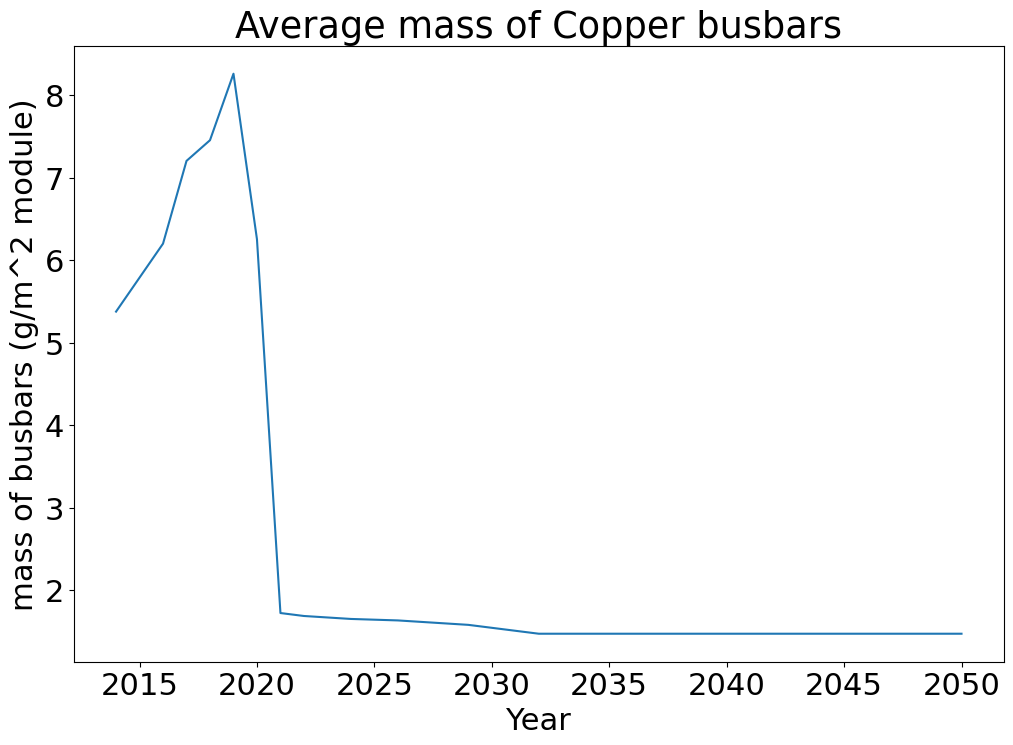

In [7]:
#now sum across the columns and multiply by the mass of the tab in each year
avg_num_busbars = pd.DataFrame(busbar_pct.agg("sum", axis="columns"))
mass_busbars = avg_num_busbars*tab_mass

mass_busbars.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_cu_g_per_m2.csv', index=True)

plt.plot(mass_busbars)
plt.title('Average mass of Copper busbars')
plt.xlabel('Year')
plt.ylabel('mass of busbars (g/m^2 module)')

We will assume prior to 2014 to be the constant mass of 3 busbars. After 2030, if busbarless/multiwire/etc technology continues to increase in marketshare then the mass of copper due to busbars is likely to continue decreasing with time. Therefore, we will assume that ...?